### "How do amenities impact Airbnb listing popularity and pricing in Chicago?"

- Amenity Variety and Listing Success:

Examine how the range and type of amenities offered (like WiFi, air conditioning, kitchen facilities, parking, etc.) correlate with the listing’s popularity, measured by the number of bookings and guest reviews.
    

- Pricing Strategies Based on Amenities:

Analyze how different amenities influence the pricing of listings. For example, do properties with more luxury amenities (like a pool, gym, or jacuzzi) charge higher prices?


- Guest Preferences for Amenities:

Investigate which amenities are most frequently mentioned in positive reviews, indicating guest preferences and satisfaction.


- Amenities and Long-term vs. Short-term Stays:

Explore whether certain amenities are more common or valued in listings that are typically booked for longer stays compared to those booked for shorter durations.


- Neighborhood-Specific Amenity Trends:

Look into how amenity offerings might vary across different neighborhoods in Chicago and how this relates to the local culture, attractions, or demographics.

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
listings = pd.read_csv('listings.csv')

In [5]:
listings_cleaned = listings.loc[:,['id', 'host_id', 'host_response_time', 'host_response_rate', 'neighbourhood_cleansed', 'latitude', 'longitude', 'accommodates', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]
listings_dropped = listings_cleaned.dropna()
listings_dropped.head()

,id,host_id,host_response_time,host_response_rate,neighbourhood_cleansed,latitude,longitude,accommodates,amenities,price,...,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,2384.0,2613,within an hour,100%,Hyde Park,41.787900,-87.587800,1,"[""Fire extinguisher"", ""Long term stays allowed...",$114.00,...,60,3.0,1125.0,4.99,4.98,4.99,4.99,4.99,4.96,4.94
1,7126.0,17928,within an hour,100%,West Town,41.901660,-87.680210,2,"[""Fire extinguisher"", ""Long term stays allowed...",$92.00,...,60,30.4,1125.0,4.70,4.84,4.56,4.90,4.87,4.89,4.75
2,10945.0,33004,within an hour,93%,Lincoln Park,41.911960,-87.639810,4,"[""Fire extinguisher"", ""Dishes and silverware"",...",$170.00,...,1125,4.0,1125.0,4.65,4.76,4.78,4.82,4.82,4.99,4.65
4,24833.0,101521,within a few hours,94%,Lincoln Park,41.925961,-87.656364,3,"[""Fire extinguisher"", ""Long term stays allowed...",$61.00,...,395,32.6,395.0,4.29,4.07,4.00,4.13,4.03,4.90,4.20
5,25879.0,101521,within a few hours,94%,Lincoln Park,41.924990,-87.655730,6,"[""Fire extinguisher"", ""Long term stays allowed...",$95.00,...,300,46.7,300.0,4.30,4.57,4.24,4.13,4.13,4.92,4.35


In [6]:
missing_values_listings = listings_cleaned.loc[~listings_cleaned.id.isin(listings_dropped.id), :]

In [7]:
listings_amenities = listings_dropped.copy()

listings_amenities.shape

(6212, 21)

In [8]:
# Convert the string representation of lists into actual lists
listings_amenities['amenities'] = listings_amenities['amenities'].apply(lambda x: x.strip('[]').replace('"', '').split(', '))

# Get the unique list of amenities across all listings
all_amenities = set([amenity for sublist in listings_amenities['amenities'] for amenity in sublist])

# Create binary columns for each amenity
for amenity in all_amenities:
    listings_amenities[amenity] = listings_amenities['amenities'].apply(lambda x: 1 if amenity in x else 0)

listings_amenities.head()

,id,host_id,host_response_time,host_response_rate,neighbourhood_cleansed,latitude,longitude,accommodates,amenities,price,...,Breakfast,Regular shampoo,LG refrigerator,52\ TV with HBO Max,Amana refrigerator,46\ HDTV with standard cable,Tresme shampoo,48\ HDTV with Roku,32\ HDTV with Hulu,Free parking on premises \u2013 1 space
0,2384.0,2613,within an hour,100%,Hyde Park,41.787900,-87.587800,1,"[Fire extinguisher, Long term stays allowed, H...",$114.00,...,0,0,0,0,0,0,0,0,0,0
1,7126.0,17928,within an hour,100%,West Town,41.901660,-87.680210,2,"[Fire extinguisher, Long term stays allowed, D...",$92.00,...,0,0,0,0,0,0,0,0,0,0
2,10945.0,33004,within an hour,93%,Lincoln Park,41.911960,-87.639810,4,"[Fire extinguisher, Dishes and silverware, Fre...",$170.00,...,0,0,0,0,0,0,0,0,0,0
4,24833.0,101521,within a few hours,94%,Lincoln Park,41.925961,-87.656364,3,"[Fire extinguisher, Long term stays allowed, D...",$61.00,...,0,0,0,0,0,0,0,0,0,0
5,25879.0,101521,within a few hours,94%,Lincoln Park,41.924990,-87.655730,6,"[Fire extinguisher, Long term stays allowed, D...",$95.00,...,0,0,0,0,0,0,0,0,0,0


In [9]:
listings_amenities.shape

(6212, 2428)

In [124]:
amenities_cat = listings_amenities.iloc[:,21:]
amenities_cat.columns = amenities_cat.columns.str.lower()

In [125]:
irrelevant_amenities = ['essentials', 'hot water', 'long term stays allowed', 'private entrance', 'single level home', 'private living room']
amenities_cat = amenities_cat.drop(irrelevant_amenities, axis=1)

## Categorizing amenities

In [126]:
# Listing keywords for each category
wifi_keywords = ['wifi']
bathroom_keywords = ['shampoo', 'body', 'conditioner', 'soap', 'shower gel', 'hair dryer']
kitchen_keywords = ['dining', 'fridge', 'oven', 'refrigerator', 'microwave', 'stove', 'blender', 'rice maker', 
                    'bread maker', 'french press', 'nespresso', 'kitchen', 'dishwasher', 'coffee', 
                    'baking', 'cooking', 'dishes', 'kettle', 'silverware', 'toaster', 'freezer', 'glasses']
leisure_keywords = ['chromecast', 'ping pong', 'piano', 'cable', 'video', 'ethernet', 'roku', 'hbo max', 'disney+',
                    'netflix', 'hulu', 'tv', 'games', 'game', 'books', 'sound', 'dvd', 'record player']
laundry_keywords = ['laundromat', 'washer', 'dryer', 'hangers', 'iron', 'clothing']
storage_keywords = ['closet', 'dresser', 'storage', 'wardrobe']
transportation_keywords = ['parking', 'garage', 'ev charger']
environment_keywords = ['mosquito net', 'heater', 'heated', 'heating', 'ac unit', 'ac - ', 'fan', 'fans', 'shades', 'fireplace', 'air conditioning']
safety_keywords = ['first aid','alarm', 'extinguisher','guard', 'safe', 'lock', 'keypad', 
                   'security camera', 'outlet covers']
exercise_keywords = ['bikes', 'yoga mat', 'gym', 'exercise', 'stationary bike', 'treadmill', 'weights']
views_keywords = ['view', 'waterfront', 'lake access', 'beach access', 'resort access']
outdoor_keywords = ['barbecue', 'sun lounger', 'hammock', 'outdoor', 'patio', 'yard', 'fire pit', 'grill', 'beach']
luxury_keywords = ['bidet', 'hot tub', 'bathtub', 'pool', 'sauna', 'rooftop']
family_keywords =  ['crib', 'baby', 'children', 'changing table', 'high chair']
bedroom_keywords = ['blankets', 'pllows', 'linen']
pet_keywords = ['pet']
convenience_keywords = ['self check-in', 'luggage', 'elevator']
cleaning_keywords = ['cleaning products', 'trash']
service_cols = ['cleaning available', 'breakfast', 'host greets you', 'building staff']
smoking_keywords = ['smoking']
work_keywords = ['workspace']

In [127]:
def categorize_amenities(df, keywords, category_name):
    # Finding columns that match the keywords
    cols = [col for col in df.columns if any(keyword in col for keyword in keywords)]
    # Creating an aggregated column if any matching column is present
    if cols:
        df[category_name] = df[cols].any(axis=1).astype(int)
        
        # Ensuring the new category column is not in the list of columns to drop
        cols_to_drop = [col for col in cols if col != category_name]
        
        # Dropping the individual columns
        df.drop(columns=cols_to_drop, inplace=True)


# Using this function to categorize amenities and clean up the DataFrame
categorize_amenities(amenities_cat, wifi_keywords, 'wifi_amenities')
categorize_amenities(amenities_cat, bathroom_keywords, 'bathroom_amenities')
categorize_amenities(amenities_cat, kitchen_keywords, 'kitchen_amenities')
categorize_amenities(amenities_cat, leisure_keywords, 'leisure_amenities')
categorize_amenities(amenities_cat, laundry_keywords, 'laundry_amenities')
categorize_amenities(amenities_cat, storage_keywords, 'storage_amenities')
categorize_amenities(amenities_cat, transportation_keywords, 'transporation_amenities')
categorize_amenities(amenities_cat, environment_keywords, 'environment_amenities')
categorize_amenities(amenities_cat, safety_keywords, 'safety_amenities')
categorize_amenities(amenities_cat, exercise_keywords, 'exercise_amenities')
categorize_amenities(amenities_cat, views_keywords, 'views_amenities')
categorize_amenities(amenities_cat, outdoor_keywords, 'outdoor_amenities')
categorize_amenities(amenities_cat, luxury_keywords, 'luxury_amenities')
categorize_amenities(amenities_cat, family_keywords, 'family_amenities')
categorize_amenities(amenities_cat, bedroom_keywords, 'bedroom_amenities')
categorize_amenities(amenities_cat, pet_keywords, 'pet_amenities')
categorize_amenities(amenities_cat, convenience_keywords, 'convenience_amenities')
categorize_amenities(amenities_cat, cleaning_keywords, 'cleaning_amenities')
categorize_amenities(amenities_cat, service_cols, 'service_amenities')
categorize_amenities(amenities_cat, smoking_keywords, 'smoking_amenities')
categorize_amenities(amenities_cat, work_keywords, 'work_amenities')

In [128]:
amenities_cat.head()
amenities_cat.shape

(6212, 71)

## Aggregating listings data with categorical columns for amenity categories

In [129]:
listings_data = pd.concat([listings_dropped, amenities_cat], axis=1)
listings_data.head()

,id,host_id,host_response_time,host_response_rate,neighbourhood_cleansed,latitude,longitude,accommodates,amenities,price,...,outdoor_amenities,luxury_amenities,family_amenities,bedroom_amenities,pet_amenities,convenience_amenities,cleaning_amenities,service_amenities,smoking_amenities,work_amenities
0,2384.0,2613,within an hour,100%,Hyde Park,41.787900,-87.587800,1,"[""Fire extinguisher"", ""Long term stays allowed...",$114.00,...,0,1,0,1,0,0,1,1,0,1
1,7126.0,17928,within an hour,100%,West Town,41.901660,-87.680210,2,"[""Fire extinguisher"", ""Long term stays allowed...",$92.00,...,0,1,0,1,0,1,0,0,0,1
2,10945.0,33004,within an hour,93%,Lincoln Park,41.911960,-87.639810,4,"[""Fire extinguisher"", ""Dishes and silverware"",...",$170.00,...,1,1,1,1,0,1,0,0,0,0
4,24833.0,101521,within a few hours,94%,Lincoln Park,41.925961,-87.656364,3,"[""Fire extinguisher"", ""Long term stays allowed...",$61.00,...,1,1,1,1,1,1,1,0,0,1
5,25879.0,101521,within a few hours,94%,Lincoln Park,41.924990,-87.655730,6,"[""Fire extinguisher"", ""Long term stays allowed...",$95.00,...,1,0,1,0,1,1,0,0,0,1


In [130]:
amenity_counts = amenities_cat.sum(axis=0)
amenity_counts

tesla only                       7
unscented                        1
public goods - gluten free       1
nexxus                           1
ps5                              2
                              ... 
convenience_amenities         5365
cleaning_amenities            3196
service_amenities             1401
smoking_amenities              141
work_amenities                4102
Length: 71, dtype: int64

In [131]:
notmeaningful_amenities = amenity_counts[amenity_counts <= 60].index.tolist()
listings_data_filtered = listings_data.drop(notmeaningful_amenities, axis=1)
listings_data_filtered.head()

,id,host_id,host_response_time,host_response_rate,neighbourhood_cleansed,latitude,longitude,accommodates,amenities,price,...,outdoor_amenities,luxury_amenities,family_amenities,bedroom_amenities,pet_amenities,convenience_amenities,cleaning_amenities,service_amenities,smoking_amenities,work_amenities
0,2384.0,2613,within an hour,100%,Hyde Park,41.787900,-87.587800,1,"[""Fire extinguisher"", ""Long term stays allowed...",$114.00,...,0,1,0,1,0,0,1,1,0,1
1,7126.0,17928,within an hour,100%,West Town,41.901660,-87.680210,2,"[""Fire extinguisher"", ""Long term stays allowed...",$92.00,...,0,1,0,1,0,1,0,0,0,1
2,10945.0,33004,within an hour,93%,Lincoln Park,41.911960,-87.639810,4,"[""Fire extinguisher"", ""Dishes and silverware"",...",$170.00,...,1,1,1,1,0,1,0,0,0,0
4,24833.0,101521,within a few hours,94%,Lincoln Park,41.925961,-87.656364,3,"[""Fire extinguisher"", ""Long term stays allowed...",$61.00,...,1,1,1,1,1,1,1,0,0,1
5,25879.0,101521,within a few hours,94%,Lincoln Park,41.924990,-87.655730,6,"[""Fire extinguisher"", ""Long term stays allowed...",$95.00,...,1,0,1,0,1,1,0,0,0,1


Chose 60 as the threshold since the data has around ~6000 rows. 
Meaningful amenity if 1% of listed properties have it.

In [132]:
amenities_filtered = listings_data_filtered.iloc[:, 21:]
amenities_filtered

,wifi_amenities,bathroom_amenities,kitchen_amenities,leisure_amenities,laundry_amenities,storage_amenities,transporation_amenities,environment_amenities,safety_amenities,exercise_amenities,...,outdoor_amenities,luxury_amenities,family_amenities,bedroom_amenities,pet_amenities,convenience_amenities,cleaning_amenities,service_amenities,smoking_amenities,work_amenities
0,1,1,1,1,1,0,1,1,1,0,...,0,1,0,1,0,0,1,1,0,1
1,1,1,1,1,1,0,1,1,1,0,...,0,1,0,1,0,1,0,0,0,1
2,1,1,1,1,1,0,1,1,1,0,...,1,1,1,1,0,1,0,0,0,0
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,1
5,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8449,1,1,1,1,1,1,1,1,1,0,...,1,1,0,1,0,0,0,1,0,1
8455,1,1,1,1,1,1,1,1,1,0,...,0,1,0,1,1,1,1,1,0,0
8468,1,1,1,1,1,0,1,1,1,1,...,1,1,0,1,0,1,1,1,0,1
8475,1,0,1,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [143]:
listings_data_filtered.loc[listings_data_filtered['safety_amenities']==1, :].sort_values(by='price', ascending=False)

,id,host_id,host_response_time,host_response_rate,neighbourhood_cleansed,latitude,longitude,accommodates,amenities,price,...,outdoor_amenities,luxury_amenities,family_amenities,bedroom_amenities,pet_amenities,convenience_amenities,cleaning_amenities,service_amenities,smoking_amenities,work_amenities
673,14167586.0,27232871,within a day,100%,West Town,41.89863,-87.67158,4,"[""Iron"", ""Fire extinguisher"", ""Kitchen"", ""TV"",...",7585.0,...,0,1,0,0,0,0,0,0,0,0
2010,33940403.0,113257336,within an hour,100%,Lincoln Park,41.91440,-87.64630,12,"[""Fire extinguisher"", ""Long term stays allowed...",2599.0,...,1,1,1,0,0,1,0,0,0,1
3887,50890121.0,411472007,a few days or more,22%,West Town,41.90439,-87.67427,16,"[""Fire extinguisher"", ""Hair dryer"", ""Security ...",2429.0,...,1,1,0,0,0,0,0,0,1,1
2143,35351226.0,31113244,within a few hours,100%,West Town,41.89500,-87.65361,16,"[""Fire extinguisher"", ""Long term stays allowed...",2358.0,...,1,1,1,1,0,1,0,1,0,1
2103,34890754.0,19578992,within an hour,100%,West Town,41.89564,-87.65398,14,"[""Long term stays allowed"", ""Dishes and silver...",2249.0,...,1,1,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2937,43414161.0,327103193,within a few hours,100%,South Chicago,41.74497,-87.54630,1,"[""Iron"", ""Fire extinguisher"", ""Kitchen"", ""TV"",...",16.0,...,1,1,0,0,0,0,0,0,0,0
2911,43055338.0,47056445,within an hour,100%,South Shore,41.76233,-87.58875,2,"[""Long term stays allowed"", ""Dishes and silver...",16.0,...,1,0,0,1,0,1,1,1,0,1
2762,41911629.0,327103193,within a few hours,100%,South Chicago,41.74477,-87.54483,2,"[""Fire extinguisher"", ""Kitchen"", ""TV"", ""Patio ...",16.0,...,1,0,0,0,0,0,0,0,0,0
2838,42471401.0,327103193,within a few hours,100%,South Chicago,41.74449,-87.54586,2,"[""Fire extinguisher"", ""Dishes and silverware"",...",16.0,...,1,0,0,1,0,0,0,0,0,0


In [145]:
listings_data_filtered.describe()

,id,host_id,latitude,longitude,accommodates,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,...,outdoor_amenities,luxury_amenities,family_amenities,bedroom_amenities,pet_amenities,convenience_amenities,cleaning_amenities,service_amenities,smoking_amenities,work_amenities
count,6.212000e+03,6.212000e+03,6212.000000,6212.000000,6212.000000,6212.000000,6212.000000,6212.000000,6212.000000,6.212000e+03,...,6212.000000,6212.000000,6212.000000,6212.000000,6212.000000,6212.000000,6212.000000,6212.000000,6212.000000,6212.000000
mean,3.348253e+17,1.749730e+08,41.895108,-87.665042,4.519156,186.208950,9.452672,543.520927,19.864971,3.442712e+06,...,0.590470,0.556665,0.310528,0.812782,0.274308,0.863651,0.514488,0.225531,0.022698,0.660335
std,3.863343e+17,1.656872e+08,0.063209,0.044441,3.055614,210.318831,16.243107,457.559068,61.464814,8.270694e+07,...,0.491787,0.496819,0.462747,0.390118,0.446201,0.343186,0.499830,0.417965,0.148951,0.473634
min,2.384000e+03,2.153000e+03,41.646767,-87.847160,1.000000,12.000000,1.000000,1.000000,1.000000,2.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.375514e+07,3.140224e+07,41.858691,-87.689215,2.000000,86.000000,2.000000,90.000000,2.000000,3.650000e+02,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,5.196797e+07,1.110626e+08,41.899189,-87.661723,4.000000,133.000000,2.000000,365.000000,2.000000,1.125000e+03,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,7.327145e+17,2.991398e+08,41.938963,-87.633324,6.000000,215.000000,5.000000,1125.000000,7.000000,1.125000e+03,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,9.730150e+17,5.325715e+08,42.022200,-87.529541,16.000000,7585.000000,365.000000,1125.000000,365.000000,2.147484e+09,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [154]:
q1 = np.percentile(listings_data_filtered['price'],25)
q3 = np.percentile(listings_data_filtered['price'],75)
intQ_range = q3-q1

#Tukey's fences
Lower_fence = q1 - 1.5*intQ_range
Upper_fence = q3 + 1.5*intQ_range

#These are the outlying observations - those outside of Tukey's fences
Outlying_obs = listings_data_filtered[(listings_data_filtered.price<Lower_fence) | (listings_data_filtered.price>Upper_fence)]
Outlying_obs

listings_data_filtered_priceoutlier = listings_data_filtered.drop(Outlying_obs.index)
listings_data_filtered_priceoutlier.describe()

,id,host_id,latitude,longitude,accommodates,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,...,outdoor_amenities,luxury_amenities,family_amenities,bedroom_amenities,pet_amenities,convenience_amenities,cleaning_amenities,service_amenities,smoking_amenities,work_amenities
count,5.763000e+03,5.763000e+03,5763.000000,5763.000000,5763.000000,5763.000000,5763.000000,5763.000000,5763.000000,5.763000e+03,...,5763.000000,5763.000000,5763.000000,5763.000000,5763.000000,5763.000000,5763.000000,5763.000000,5763.000000,5763.000000
mean,3.358681e+17,1.750014e+08,41.894348,-87.665672,4.118168,145.304876,9.779108,542.714905,20.965400,3.710872e+06,...,0.578518,0.545896,0.293250,0.810862,0.266181,0.861877,0.508242,0.218810,0.023425,0.660767
std,3.869636e+17,1.666823e+08,0.064713,0.045230,2.522462,84.138657,16.612536,458.472179,63.620268,8.586314e+07,...,0.493839,0.497932,0.455292,0.391652,0.441998,0.345058,0.499975,0.413475,0.151263,0.473490
min,2.384000e+03,2.153000e+03,41.646767,-87.847160,1.000000,12.000000,1.000000,1.000000,1.000000,2.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.389211e+07,3.166918e+07,41.856140,-87.690800,2.000000,83.000000,2.000000,90.000000,2.000000,3.650000e+02,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,5.196192e+07,1.074344e+08,41.899103,-87.662780,4.000000,125.000000,2.000000,365.000000,2.000000,1.125000e+03,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,7.346265e+17,3.112000e+08,41.939570,-87.633217,6.000000,191.000000,7.000000,1125.000000,12.500000,1.125000e+03,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,9.730150e+17,5.325715e+08,42.022200,-87.529541,16.000000,408.000000,365.000000,1125.000000,365.000000,2.147484e+09,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Analyzing the distribution of amenities

In [157]:
amenities_count = amenities_filtered.sum().sort_values(ascending=False)
amenities_count.head(5)

environment_amenities    6191
safety_amenities         6171
wifi_amenities           6147
kitchen_amenities        6107
laundry_amenities        6092
dtype: int64

<Axes: xlabel='safety_amenities', ylabel='price'>

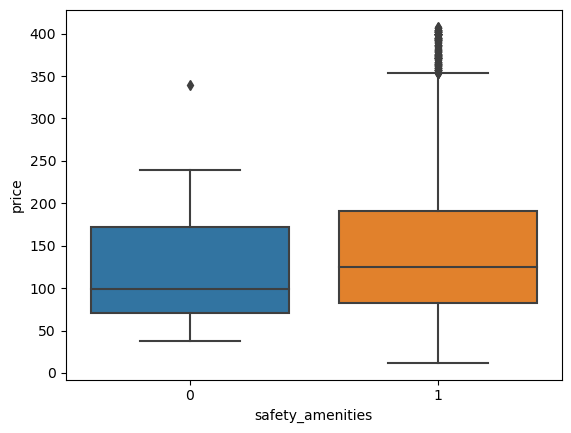

In [156]:
import seaborn as sns

sns.boxplot(data = listings_data_filtered_priceoutlier, x = 'environment_amenities', y = 'price')

<Axes: xlabel='safety_amenities', ylabel='price'>

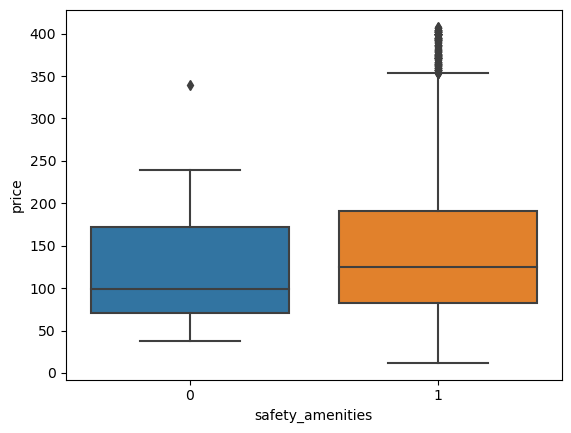

In [158]:
sns.boxplot(data = listings_data_filtered_priceoutlier, x = 'safety_amenities', y = 'price')

<Axes: xlabel='kitchen_amenities', ylabel='price'>

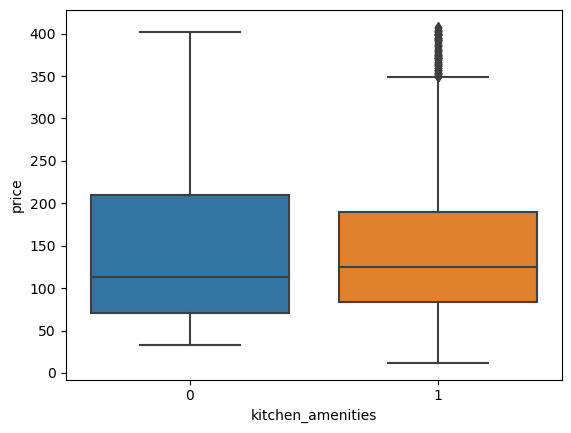

In [162]:
sns.boxplot(data = listings_data_filtered_priceoutlier, x = 'kitchen_amenities', y = 'price')

<Axes: xlabel='laundry_amenities', ylabel='price'>

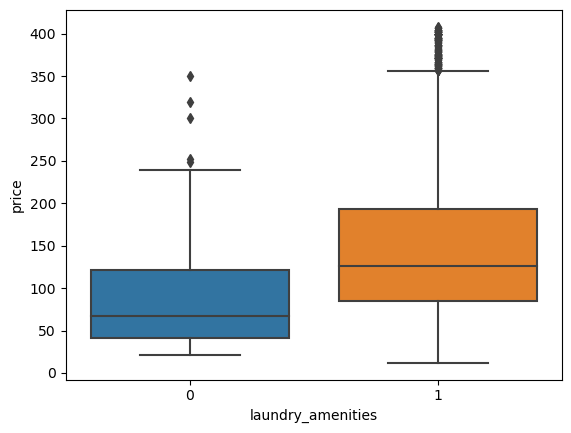

In [163]:
sns.boxplot(data = listings_data_filtered_priceoutlier, x = 'laundry_amenities', y = 'price')

### Visualization 1

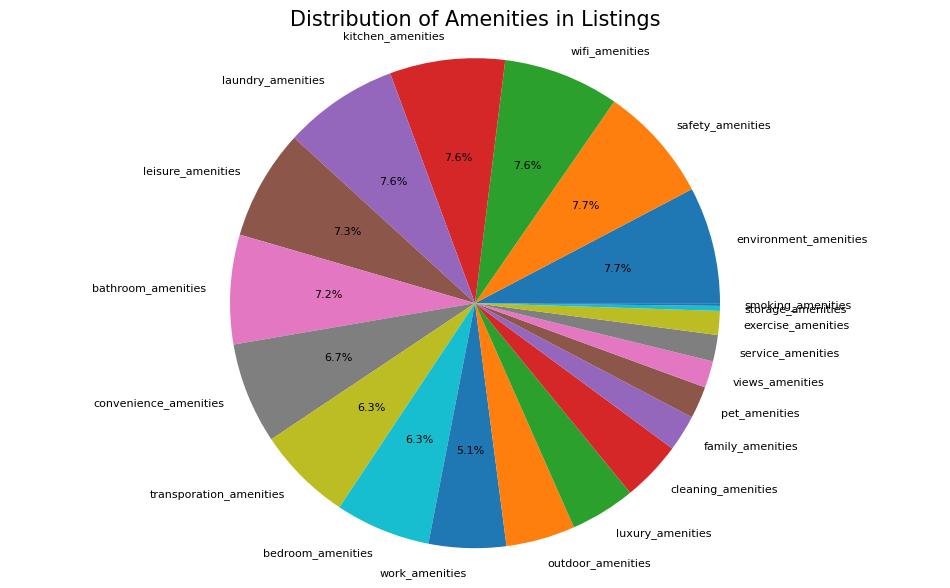

In [134]:
import matplotlib.pyplot as plt

# Pie chart
plt.figure(figsize=(12,7))
plt.pie(
    amenities_count, 
    labels = amenities_count.index, 
    autopct =lambda pct: ('%1.1f%%' % pct) if pct >= 5 else '',
    textprops=dict(color="black", size=8)
)

plt.axis('equal')

plt.title('Distribution of Amenities in Listings', fontsize=15)

plt.show()

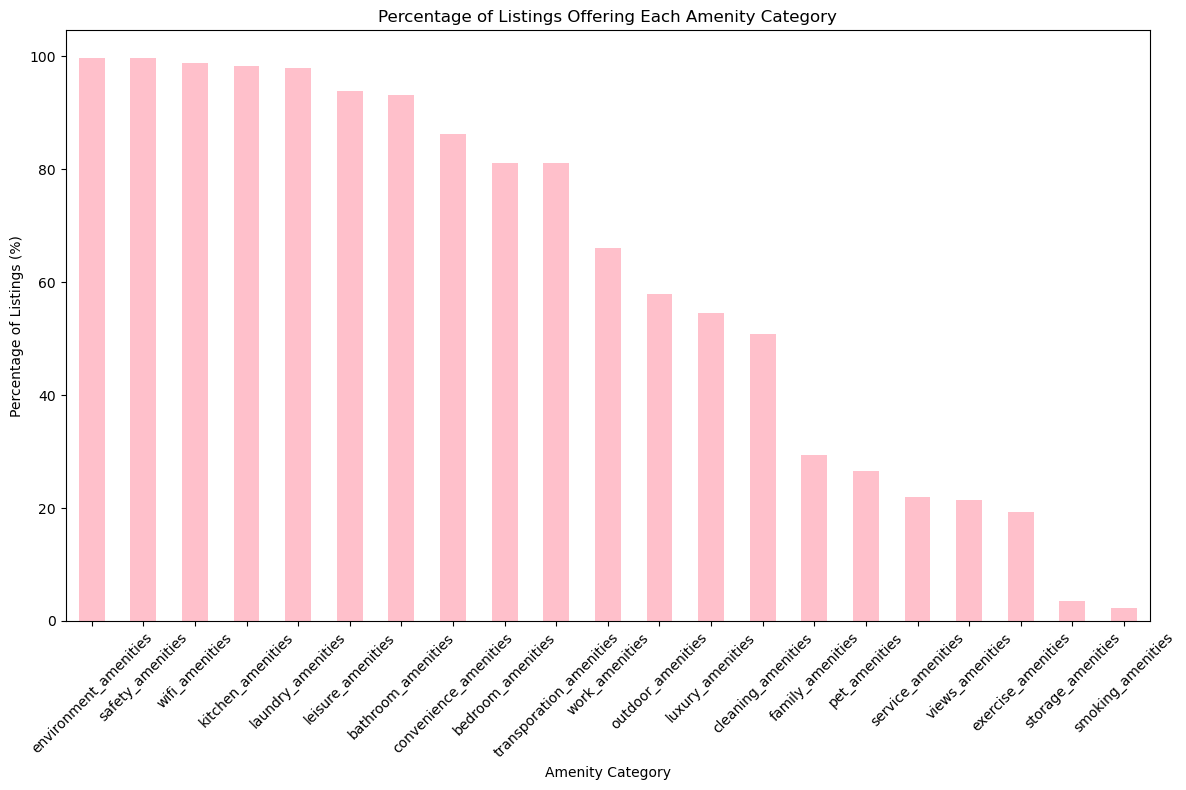

In [171]:
import pandas as pd
import matplotlib.pyplot as plt

amenity_categories = list(amenities_count.index)

percentages = listings_data_filtered_priceoutlier[amenity_categories].mean() * 100

# Sort the percentages in descending order
sorted_percentages = percentages.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sorted_percentages.plot(kind='bar', color='pink')
plt.title('Percentage of Listings Offering Each Amenity Category')
plt.xlabel('Amenity Category')
plt.ylabel('Percentage of Listings (%)')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the layout to fit the labels
plt.show()

### Visualization 2

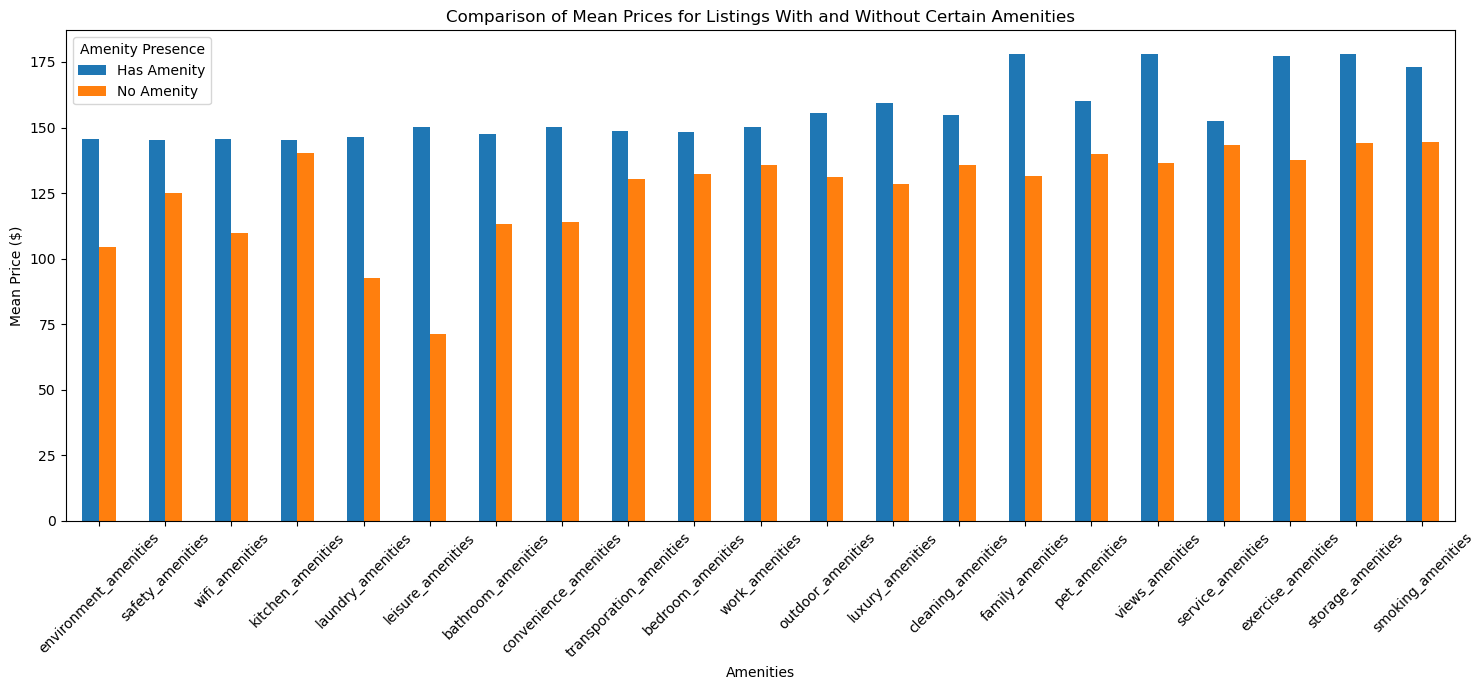

In [169]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert price to numeric if it's not already
listings_data_filtered_priceoutlier['price'] = pd.to_numeric(listings_data_filtered_priceoutlier['price'].str.replace('$', '').str.replace(',', ''), errors='coerce')

# list of all amenity categories
amenity_categories = list(amenities_count.index)

# Calculate mean prices for listings with and without each amenity
amenity_price_comparison = {}
for amenity in amenity_categories:
    has_amenity = listings_data_filtered_priceoutlier[listings_data_filtered_priceoutlier[amenity] == 1]['price'].mean()
    no_amenity = listings_data_filtered_priceoutlier[listings_data_filtered_priceoutlier[amenity] == 0]['price'].mean()
    amenity_price_comparison[amenity] = {'Has Amenity': has_amenity, 'No Amenity': no_amenity}

# Convert the dictionary to a DataFrame for easier plotting
price_comparison_df = pd.DataFrame(amenity_price_comparison)

# Plot the mean prices
price_comparison_df.T.plot(kind='bar', figsize=(15, 7))
plt.title('Comparison of Mean Prices for Listings With and Without Certain Amenities')
plt.ylabel('Mean Price ($)')
plt.xlabel('Amenities')
plt.xticks(rotation=45)
plt.legend(title='Amenity Presence')
plt.tight_layout()  # Adjust the layout to fit the labels
plt.show()

#### ANALYSIS:

Leisure amenities and laundry amenities seem to have the largest differences in mean price between listings that have and do not have those amenities. Family amenities and environment amenities, exercise amenities flow closely behind. So if hosts are trying to list their properties at higher prices, it would be most effective for them to choose the these amenities to implement. 

It may not be worth the investment to offer kitchen amenities or service amenities, since these categories have the smallest difference in mean price between listings that offer them and those that do not.

The amenities with the largest differentials also seem to correlate with the amenities that have the highest percentages of listings that offer,
which would imply that these amenities are essentials/basic needs for airbnb listings.

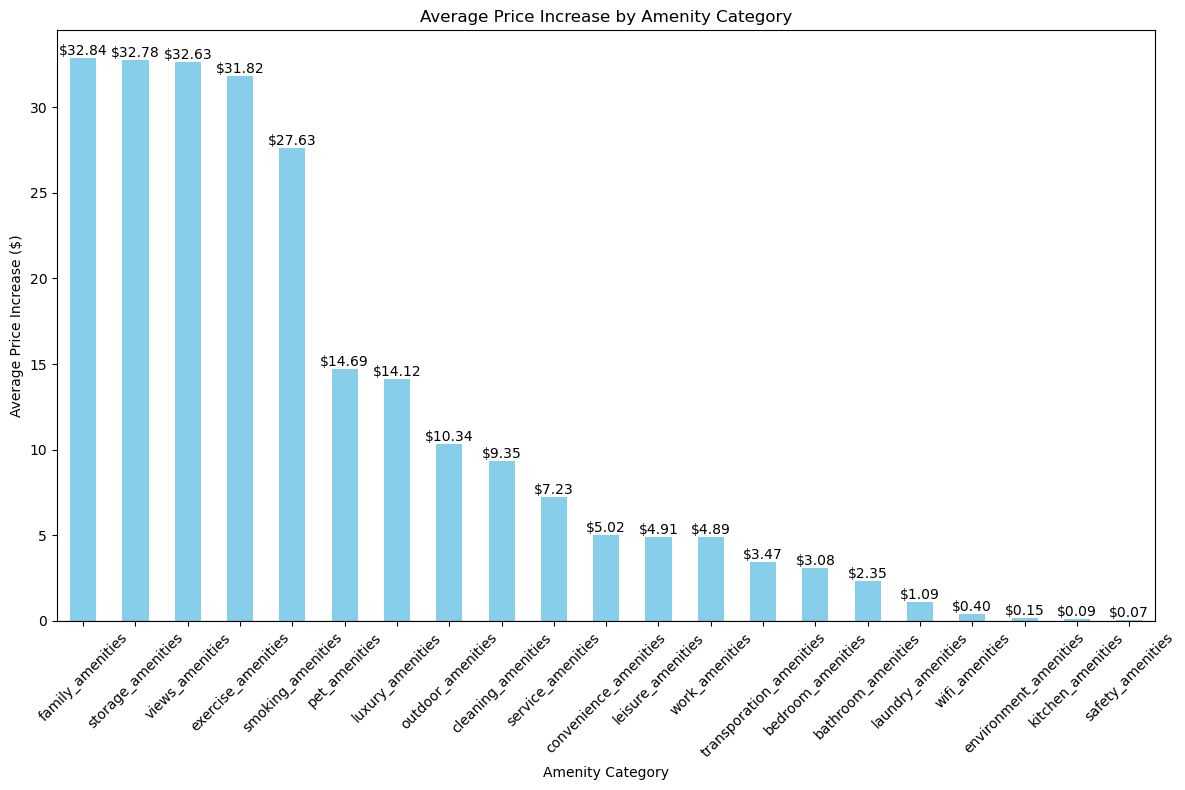

In [180]:
import pandas as pd
import matplotlib.pyplot as plt

amenity_categories = list(amenities_count.index)

overall_average_price = listings_data_filtered_priceoutlier['price'].mean()

# Initialize a dictionary to store the price differential for each amenity
price_differential = {}

# Iterate over each amenity category to calculate the average price
for amenity_category in amenity_categories:
    # Calculate the average price for listings with each amenity category
    has_amenity = listings_data_filtered_priceoutlier[listings_data_filtered_priceoutlier[amenity_category] == 1]['price'].mean()
    # Calculate the price differential
    price_differential[amenity_category] = has_amenity - overall_average_price

# Sort the amenities by price differential
sorted_differential = pd.Series(price_differential).sort_values(ascending=False)

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
sorted_differential.plot(kind='bar', color='skyblue', ax=ax)
ax.set_title('Average Price Increase by Amenity Category')
ax.set_xlabel('Amenity Category')
ax.set_ylabel('Average Price Increase ($)')
ax.axhline(0, color='black', linewidth=0.8)  # Adds a horizontal line at y=0 for reference

# Annotate the bars with the value of the price differential
for i, v in enumerate(sorted_differential):
    ax.text(i, v if v > 0 else 0, f"${v:.2f}", color='black', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout
plt.show()

### Visualization 3

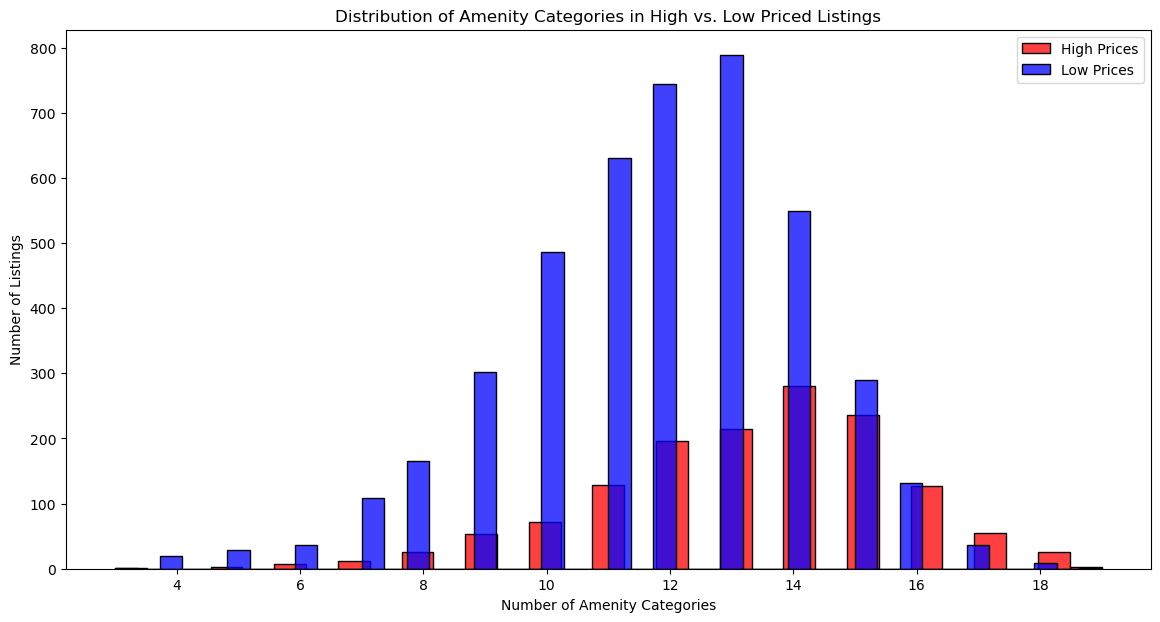

In [174]:
# Define a threshold for high prices (e.g., 75th percentile of the price distribution)
high_price_threshold = listings_data_filtered_priceoutlier['price'].quantile(0.75)

# Count the number of amenities for each listing
listings_data_filtered_priceoutlier['amenity_count'] = listings_data_filtered_priceoutlier.iloc[:, listings_data_filtered_priceoutlier.columns.get_loc('wifi_amenities'):listings_data_filtered_priceoutlier.columns.get_loc('work_amenities')].sum(axis=1)

# Segment the DataFrame into high and low prices
high_prices = listings_data_filtered_priceoutlier[listings_data_filtered_priceoutlier['price'] > high_price_threshold]['amenity_count']
low_prices = listings_data_filtered_priceoutlier[listings_data_filtered_priceoutlier['price'] <= high_price_threshold]['amenity_count']

# Plotting the distribution of amenity counts for high and low prices
plt.figure(figsize=(14, 7))
sns.histplot(high_prices, color="red", label='High Prices', kde=False)
sns.histplot(low_prices, color="blue", label='Low Prices', kde=False)
plt.xlabel('Number of Amenity Categories')
plt.ylabel('Number of Listings')
plt.title('Distribution of Amenity Categories in High vs. Low Priced Listings')
plt.legend()
plt.show()


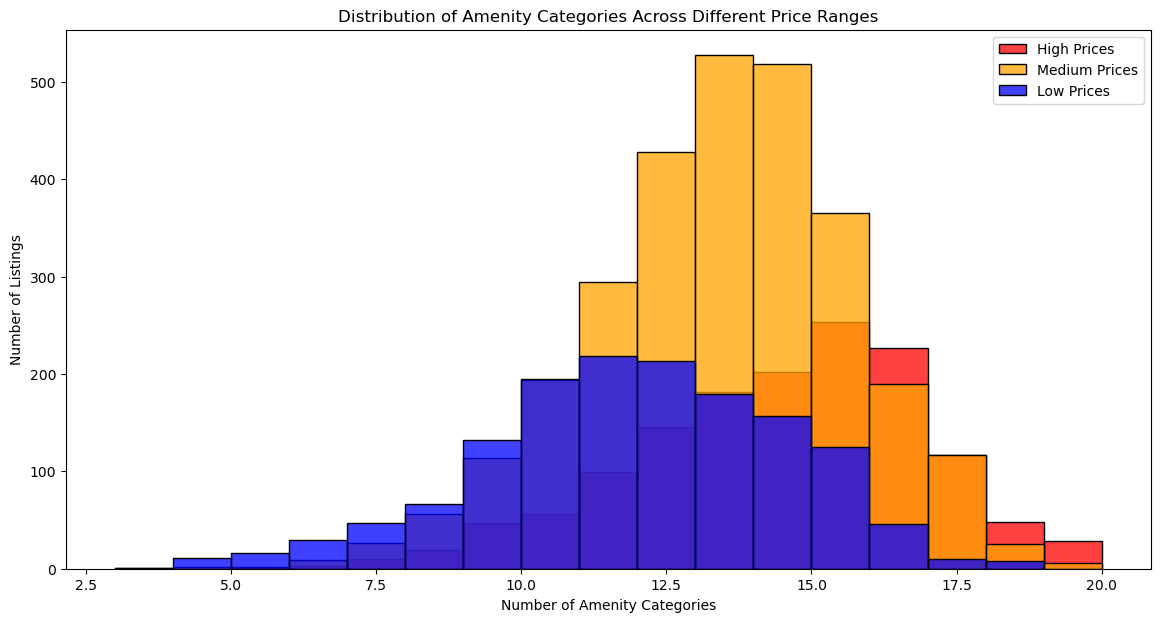

In [175]:
low_price_threshold = listings_data_filtered_priceoutlier['price'].quantile(0.25)
high_price_threshold = listings_data_filtered_priceoutlier['price'].quantile(0.75)

# Count the number of amenities for each listing
listings_data_filtered_priceoutlier['amenity_count'] = listings_data_filtered_priceoutlier.iloc[:, listings_data_filtered_priceoutlier.columns.get_loc('wifi_amenities'):listings_data_filtered_priceoutlier.columns.get_loc('work_amenities') + 1].sum(axis=1)

# Segment the DataFrame into high, medium, and low prices
high_prices = listings_data_filtered_priceoutlier[listings_data_filtered_priceoutlier['price'] > high_price_threshold]['amenity_count']
medium_prices = listings_data_filtered_priceoutlier[(listings_data_filtered_priceoutlier['price'] > low_price_threshold) & (listings_data_filtered_priceoutlier['price'] <= high_price_threshold)]['amenity_count']
low_prices = listings_data_filtered_priceoutlier[listings_data_filtered_priceoutlier['price'] <= low_price_threshold]['amenity_count']

# Plotting the distribution of amenity counts for high, medium, and low prices
plt.figure(figsize=(14, 7))
sns.histplot(high_prices, color="red", label='High Prices', kde=False, binwidth=1)
sns.histplot(medium_prices, color="orange", label='Medium Prices', kde=False, binwidth=1)
sns.histplot(low_prices, color="blue", label='Low Prices', kde=False, binwidth=1)
plt.xlabel('Number of Amenity Categories')
plt.ylabel('Number of Listings')
plt.title('Distribution of Amenity Categories Across Different Price Ranges')
plt.legend()
plt.show()

#### ANALYSIS:

The number of different amenity categories don't seem to matter as much as specifically what amenity categories are offered. We see from the plot that there are a lot more low priced lisitings compared to high priced listings, 
Most listings seem to offer 11-13 amenity categories out of the 21 that I have identified.

Very high prices are only justified when the listing offers the extreme end of the number of amenities cateogories.

In [182]:
### THIS IS THE DATAFRAME THAT I AM USING AFTER REMOVING PRICE OUTLIERS + ADDING CATEGORICAL COLUMNS FOR AMENITY CATEGORIES

listings_data_filtered_priceoutlier

,id,host_id,host_response_time,host_response_rate,neighbourhood_cleansed,latitude,longitude,accommodates,amenities,price,...,luxury_amenities,family_amenities,bedroom_amenities,pet_amenities,convenience_amenities,cleaning_amenities,service_amenities,smoking_amenities,work_amenities,amenity_count
0,2.384000e+03,2613,within an hour,100%,Hyde Park,41.787900,-87.587800,1,"[""Fire extinguisher"", ""Long term stays allowed...",114.0,...,1,0,1,0,0,1,1,0,1,14
1,7.126000e+03,17928,within an hour,100%,West Town,41.901660,-87.680210,2,"[""Fire extinguisher"", ""Long term stays allowed...",92.0,...,1,0,1,0,1,0,0,0,1,12
2,1.094500e+04,33004,within an hour,93%,Lincoln Park,41.911960,-87.639810,4,"[""Fire extinguisher"", ""Dishes and silverware"",...",170.0,...,1,1,1,0,1,0,0,0,0,14
4,2.483300e+04,101521,within a few hours,94%,Lincoln Park,41.925961,-87.656364,3,"[""Fire extinguisher"", ""Long term stays allowed...",61.0,...,1,1,1,1,1,1,0,0,1,19
5,2.587900e+04,101521,within a few hours,94%,Lincoln Park,41.924990,-87.655730,6,"[""Fire extinguisher"", ""Long term stays allowed...",95.0,...,0,1,0,1,1,0,0,0,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8449,9.680970e+17,82950654,within an hour,100%,Austin,41.900071,-87.751783,12,"[""Fire extinguisher"", ""Long term stays allowed...",299.0,...,1,0,1,0,0,0,1,0,1,14
8455,9.683600e+17,430882859,within a few hours,100%,Uptown,41.955383,-87.649993,3,"[""Fire extinguisher"", ""Long term stays allowed...",109.0,...,1,0,1,1,1,1,1,0,0,16
8468,9.697680e+17,235678953,within an hour,99%,Near West Side,41.887883,-87.643916,6,"[""Fire extinguisher"", ""Long term stays allowed...",216.0,...,1,0,1,0,1,1,1,0,1,17
8475,9.703900e+17,17266955,within a few hours,82%,Edgewater,41.988150,-87.673240,2,"[""Fire extinguisher"", ""TV"", ""Wifi"", ""Smoke ala...",90.0,...,0,0,0,0,0,0,0,0,1,7
